## **Cuaderno demo: Panda, Numpy, MatPlotLib, funciones anónimas y carga de ficheros**

24_25


# Introducción a Numpy y Panda

Web: [Numpy](https://numpy.org/)

Web: [Pandas](https://pandas.pydata.org/)

Web: [Matplotlib](https://matplotlib.org/)

Web: [Scipy](https://scipy.org/)

Web: [Scikit-learn](https://scikit-learn.org/stable/)

In [3]:
import matplotlib
# CARGAMOS LIBRERIAS
# ==============================================================================
# Importamos la librería NUMPY para CÁLCULO NUMÉRICO Y ANÁLISIS DE DATOS
import numpy as np
# PANDAS para MANIPULACIÓN y ANÁLISIS DE DATOS
import pandas as pd
# MATPLOTLIB para GRAFICOS
import matplotlib.pyplot as plt
# SCIPY para CÁLCULO MATEMÁTICO
import scipy # necesario para conocer la versión
import scipy.stats as st
# Preprocesado
#==============================================================================
import sklearn # necesario para conocer la versión
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
# Versiones
#==============================================================================
version_np = np.version.version
version_pd = pd.__version__
version_plt = matplotlib.__version__
version_scipy = scipy.__version__
version_sklearn = sklearn.__version__


**Creación de objetos:**

1.   Objeto array (numpy)
2.   Objeto DataFrame (pandas)



**Objeto array** Todos los datos del mismo tipo (dtype)

In [4]:
# creación de una matriz de números floats
x=np.array([[1.,2,3, 4],[5,6,7,8],[9,10,11,12]])
x

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [5]:
# tipo de datos
x.dtype

dtype('float64')

In [6]:
# array con contenido de cadenas
x_txt=np.array([['a','b','c'],['d','e','f'],['g','h','i']])
x_txt.dtype # <U1 --> Significa tipo de dato unicode de longitud 1


dtype('<U1')

In [7]:
# Acceso a elementos x[filas,columnas]
# Atención: empieza a numerar desde el 0
x[0,0]

1.0

In [8]:
# También se puede utilizar
x[0][0]

1.0

In [9]:
# Columna 2
x[:,1]

array([ 2.,  6., 10.])

In [10]:
# Ejer 1: Mostrar la columa 4
x[:,3]


array([ 4.,  8., 12.])

In [11]:
# Fila 2
x[1,:]

array([5., 6., 7., 8.])

In [12]:
#Ejer 2: mostrar la fila 1
x[0,:]

array([1., 2., 3., 4.])

In [13]:
# Extraer la submatriz columnas 2 y 4
x_new = x[:,[1,3]]
x_new

array([[ 2.,  4.],
       [ 6.,  8.],
       [10., 12.]])

In [14]:
#Ejer 3: Extraer la submatriz de las filas 1 y 3
x_new = x[1:3,:]
x_new

array([[ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

**Definición 1:** Crear un dataframe directamente

**¿Qué es un dataframe?**

Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL o el data.frame de R. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

Título: [Comenzando con datos](https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/)


**Objeto DataFrame** Las columnas de la tabla pueden tener diferentes *dtype*

In [15]:
# Definición de DataFrame
df=pd.DataFrame(
    {"A": 1.0,
     "B": pd.Categorical(["H","H","H","M","M"]),
     "C": np.array([1., 2., 3., 4., 5.]),
    }
)

In [16]:
# visualización del objeto DataFrame df
df

,A,B,C
0,1.0,H,1.0
1,1.0,H,2.0
2,1.0,H,3.0
3,1.0,M,4.0
4,1.0,M,5.0


In [17]:
df.dtypes

A     float64
B    category
C     float64
dtype: object

In [18]:
#Resumen estadística basica descriptiva
df.describe()

,A,C
count,5.0,5.000000
mean,1.0,3.000000
std,0.0,1.581139
min,1.0,1.000000
25%,1.0,2.000000
50%,1.0,3.000000
75%,1.0,4.000000
max,1.0,5.000000


In [19]:
#Ejer 4: crear un dataframe con una lista (ficticia) de municipios de Gran canaria y el número de habitantes separados por géneros (Masculino, Femenino, etc...)
data = pd.DataFrame({
    'Municipio': ['Las Palmas de Gran Canaria', 'Telde', 'Santa Brígida', 'Arucas', 'Gáldar'],
    'Masculino': [200000, 50000, 10000, 15000, 12000],
    'Femenino': [210000, 52000, 11000, 16000, 13000],
    'Otros': [500, 100, 50, 75, 60]
})
data

,Municipio,Masculino,Femenino,Otros
0,Las Palmas de Gran Canaria,200000,210000,500
1,Telde,50000,52000,100
2,Santa Brígida,10000,11000,50
3,Arucas,15000,16000,75
4,Gáldar,12000,13000,60


In [20]:
#Ejer 5: Mostrar los tipos de datos asociados a cada columna
data.dtypes

Municipio    object
Masculino     int64
Femenino      int64
Otros         int64
dtype: object

In [21]:
#Ejer 6: modificar uno o más valores de una de las columnas
data.at[2, 'Masculino'], data.at[3, 'Femenino'] = 2, 5
data

,Municipio,Masculino,Femenino,Otros
0,Las Palmas de Gran Canaria,200000,210000,500
1,Telde,50000,52000,100
2,Santa Brígida,2,11000,50
3,Arucas,15000,5,75
4,Gáldar,12000,13000,60


In [22]:
#Ejer 7: Cambiar alguno de los valores de forma directa
data.at[2, 'Masculino'], data.at[3, 'Femenino'] = 2, 5
data

,Municipio,Masculino,Femenino,Otros
0,Las Palmas de Gran Canaria,200000,210000,500
1,Telde,50000,52000,100
2,Santa Brígida,2,11000,50
3,Arucas,15000,5,75
4,Gáldar,12000,13000,60


In [23]:
#Ejer 8: Obtener estadística basica descriptiva
data.describe()

,Masculino,Femenino,Otros
count,5.000000,5.000000,5.000000
mean,55400.400000,57201.000000,157.000000
std,82950.253772,87655.901142,192.665513
min,2.000000,5.000000,50.000000
25%,12000.000000,11000.000000,60.000000
50%,15000.000000,13000.000000,75.000000
75%,50000.000000,52000.000000,100.000000
max,200000.000000,210000.000000,500.000000


**Definición 2**: a partir de un objeto array (creado con numpy) crear un dataframe

In [24]:
# creamos 70 fechas consecutivas iniciando en el día 10-sep-2022, (en inglés, 20220910)
fechas = pd.date_range("20220910", periods=70)
fechas

DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
      

In [25]:
# x-> datos, index-> nombre de filas (es la forma con la que se podrán identificar cada fila), colums-> nombre de columnas
# Generamos una matriz de 70 filas por 2 columnas de números aleatorios "normales" (Distribución normal)
# de media 0 y desviación típica 1
df_fechas = pd.DataFrame(np.random.randn(70, 2),index=fechas,columns=["col1","col2"])
df_fechas

,col1,col2
2022-09-10,-1.489056,-1.104105
2022-09-11,0.476611,-1.461715
2022-09-12,0.871972,1.727704
2022-09-13,0.249003,-0.352231
2022-09-14,-1.257495,-0.202970
...,...,...
2022-11-14,1.318505,-1.023711
2022-11-15,0.011550,-0.443787
2022-11-16,-1.364608,1.252477
2022-11-17,-0.682532,-0.482006


In [26]:
# Metodos objeto.metodo df.< TAB >
# Ejemplos: situate al final del comando + barra espaciadora
#           df.head() primeros registros
#           df.tail() ultimos registros
#           df.index() nombre de las filas
#           df.columns()  nombre de las columnas
#           df.describe() estadística basica descriptiva
#           df.T() transpuesta
df_fechas.describe()

,col1,col2
count,70.000000,70.000000
mean,-0.059278,-0.069673
std,1.051065,0.966128
min,-2.859789,-2.927366
25%,-0.815393,-0.737844
50%,0.056524,-0.220849
75%,0.697519,0.545106
max,2.235068,2.046250


In [47]:
#Ejer 9: realizar un ejemplo de cada uno de los siguientes comandos
df_fechas.head()
df_fechas.tail()
df_fechas.index
df_fechas.columns
df_fechas.describe()
df_fechas.T


,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,...,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18
col1,-1.489056,0.476611,0.871972,0.249003,-1.257495,2.235068,0.626095,-0.536245,-1.146489,-0.282887,...,-0.063326,-0.408651,0.681246,1.284897,1.987638,1.318505,0.011550,-1.364608,-0.682532,1.053966
col2,-1.104105,-1.461715,1.727704,-0.352231,-0.202970,1.904211,-0.627909,-1.691906,0.475110,-0.218286,...,-0.235312,-0.223412,-0.745531,-0.957860,0.451413,-1.023711,-0.443787,1.252477,-0.482006,-1.249484



**Selección de registros**

*   Por etiquetas
*   Por posición
*   Por condición booleana








In [49]:
# Selección de columnas (variable)
# Varias columnas df[["col1","col2"]]
df_fechas[["col2"]]


,col2
2022-09-10,-1.104105
2022-09-11,-1.461715
2022-09-12,1.727704
2022-09-13,-0.352231
2022-09-14,-0.202970
...,...
2022-11-14,-1.023711
2022-11-15,-0.443787
2022-11-16,1.252477
2022-11-17,-0.482006


In [29]:
# Selección de filas
# del 01 al 31 de octubre
df_fechas["20221001":"20221031"]

,col1,col2
2022-10-01,-0.267552,-0.853542
2022-10-02,-2.210120,0.960233
2022-10-03,-0.783263,-0.762914
2022-10-04,1.126308,-0.174002
2022-10-05,0.607412,-1.133965
2022-10-06,0.342714,0.930066
2022-10-07,-0.435162,-0.527123
2022-10-08,1.040903,-0.474574
2022-10-09,-0.605022,1.566488
2022-10-10,0.775933,-0.174140


In [30]:
# Selección de submatriz (slice)
# Método .loc selección por etiquetas
df_fechas.loc["20220920":"20220930", ["col1", "col2"]]


,col1,col2
2022-09-20,-0.881511,1.073085
2022-09-21,0.820279,-0.714782
2022-09-22,0.080056,0.475504
2022-09-23,-2.130518,-0.836147
2022-09-24,0.939670,-0.885352
2022-09-25,-1.528489,-0.452067
2022-09-26,1.161272,1.189256
2022-09-27,-0.265587,1.004887
2022-09-28,-1.335987,-2.927366
2022-09-29,-1.399778,0.104172


In [31]:
# Selección por posición
# df.iloc[filas, columnas]
# df.iloc[ posiciones 1, 2, 3 , 4, posiciones 0]
# df.iloc[ filas 2, 3, 4, 5, columna 1]
df.iloc[1:5, 0:1]

,A
1,1.0
2,1.0
3,1.0
4,1.0


In [32]:
# Selección por condición booleana
# Nos quedamos con los datos que tienen un valor positivo en la columna indicada
df1=df[df["C"]>3]
df1

,A,B,C
3,1.0,M,4.0
4,1.0,M,5.0


**El método apply**: se combina una funcionalidad de Numpy en un objeto dataframe

In [33]:
# aplicamos la función suma acumulada definida en numpy a nuestros datos (dataframe)
df_fechas.apply(np.cumsum)

,col1,col2
2022-09-10,-1.489056,-1.104105
2022-09-11,-1.012445,-2.565820
2022-09-12,-0.140473,-0.838117
2022-09-13,0.108530,-1.190348
2022-09-14,-1.148964,-1.393318
...,...,...
2022-11-14,-3.167840,-3.954330
2022-11-15,-3.156290,-4.398116
2022-11-16,-4.520898,-3.145639
2022-11-17,-5.203430,-3.627645


**Definición de funciones anónimas**

In [50]:
# La función x toma el argumento a, le suma 10 y lo devuelve
mi_funcion_anonima = lambda a : a + 10
print(mi_funcion_anonima(5))

15


In [35]:
mi_funcion_anonima_1 = lambda a, b : a * b
print(mi_funcion_anonima_1(5, 6))

30


In [36]:
df['C']

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: C, dtype: float64

In [37]:
df['C'].max()

5.0

In [38]:
df['C'].min()

1.0

In [60]:
#Ejer 10: Crear una función anónima denomminada mi_funcion_rango, que pasándole por parámetro la columna "C" de df obtenga el rango
#      de los valores que forman parte de dicha columna
mi_funcion_rango = lambda a : f"min: {a.min()}, máx: {a.max()}"
print(mi_funcion_rango(df['C']))

min: 1.0, máx: 5.0


A continuación tenemos unos accesos que nos permitiran conocer de forma rápida las librerías de Matplotlib y Pandas

[introducción rápida a Matplotlib](https://aprendeconalf.es/docencia/python/manual/matplotlib/#integraci%C3%B3n-con-pandas)

[Introducción rápida a Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

# **Ya podemos empezar**

In [ ]:

# Descargar el dataset que se utilizará utilizaNdo un enlace compartido de google drive
# Si la URL es https://drive.google.com/file/d/IDFICHEROCOMPARTIDO se debe utilizar:
# !gdown --id IDFICHEROCOMPARTIDO
# En nuestro caso, hemos de hacer uso de parte de la información que hay en el siguiente enlace, que corresponde
# con elenlace cunado se comparte un fichero:
#
# https://drive.google.com/file/d/18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5/view?usp=sharing
#
# Este comando Linux, solo funciona en Google Colab, no en local
# Con la exclamación ! ejecutamos un comando (programa) Linux que se ejecuta en la máquina virtual


# --- COMO YO NO ESTOY USANDO GOOGLE COLAB, NO SE PUEDE USAR EL COMANDO ---
!gdown --id 18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5   #Lo descargo desde google drive directamente
# --- COMO YO NO ESTOY USANDO GOOGLE COLAB, NO SE PUEDE USAR EL COMANDO ---



#
# Ignorar el mensaje que se muestra al ejecutarse, indicando que el comando -id is deprecated
#
# Una vez ha sido descargado a nuestros recursos de  Google Colab, como recurso de este cuaderno, es interesante descargarlo
# y abrirlo con alguna herramienta  ono Notepad++ o LibreOffice


"gdown" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [66]:
# Cargamos el fichero csv  denominado datos.csv con
Datos= pd.read_csv('datos.csv', delimiter=';')
# importante--> OBSERVAR que Datos es un DataFrame como el df que se ha trabajado anteriormente
# Mostrar filas y columnas de la matriz de datos
Datos.shape

(19, 3)

In [67]:
# Mostramos el contenido de los datos (variables)
# Contiene la renta media en 2020 por comunidades y la variación de rentas (en porcentajes) respecto al año anterior
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [68]:
# Mostramos las comunidades autónomas
Datos["Comunidad"]

0                ANDALUCIA
1                   ARAGON
2                 ASTURIAS
3                  BALEARS
4                 CANARIAS
5                CANTABRIA
6          CASTILLA Y LEON
7     CASTILLA Y LA MANCHA
8                CATALUNYA
9                 VALENCIA
10             EXTREMADURA
11                 GALICIA
12                  MADRID
13                  MURCIA
14                 NAVARRA
15              PAIS VASCO
16                   RIOJA
17                   CEUTA
18                 MELILLA
Name: Comunidad, dtype: object

In [ ]:
# Le cambiamos el nombre de la comunidad de CANARIAS a Islas Canarias
Datos.iloc[4,0]='Islas Canarias'

Datos


,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,Islas Canarias,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [69]:
#Ejer 11: Volver a cambiar a CANARIAS
Datos.iloc[4,0]= 'CANARIAS'
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
Datos.describe()

,Renta,DiferenciaRenta
count,19.000000,19.000000
mean,22795.684211,-9.726316
std,4542.137982,4.164245
min,17448.000000,-22.700000
25%,19464.000000,-10.150000
50%,21903.000000,-8.600000
75%,26113.000000,-7.450000
max,32048.000000,-5.200000


**Objeto matriz de numpy**

In [ ]:
# Transformamos una parte del objeto DataFrame a un objeto matriz para trabajar con métodos de numpy
DatosMatriz=Datos[["Renta", "DiferenciaRenta"]].to_numpy()
DatosMatriz
# Por curiosidad, fijarse como los datos de Canarias coinciden en la fila (al igual que el resto de los datos...)


   Comunidad  Renta  DiferenciaRenta
1     ARAGON  26512             -7.8
8  CATALUNYA  27812            -10.9


**Visualizar DatosMatriz**

In [ ]:
DatosMatriz

array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Cálculo de la media y desviación típica**

In [ ]:
np.mean(DatosMatriz,axis=0) # Calcula la media aritmetica de los datos,
                      # (por columnas) axis=1 para calcular la media por filas

array([ 2.27956842e+04, -9.72631579e+00])

**Librería matplotlib: Histograma**

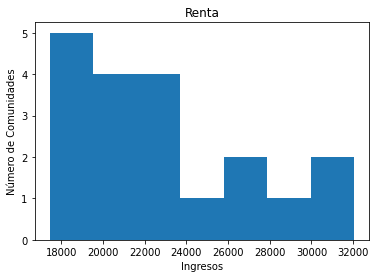

In [ ]:
# Para mostrar en el histograma los datos de ingresos hemos de indicar que queremos todas las filas de la primera columna
plt.hist(DatosMatriz[:,0],7 ) # recordar, columna 0 = primera variable y el 7 indica el número de grupos(columnas) a mostrar
#plt.hist(DatosMatriz[:,0]) # recordar, columna 0 = primera variable
plt.ylabel('Número de Comunidades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()

In [ ]:
#Ejer 12: Filtrando los datos en el dataframe Datos, identificar las comunidades autónomas cuya renta
#      Apartado 1: Renta entre 26000€ y 28000€
apartado_1 = Datos[(Datos['Renta'] >= 26000) & (Datos['Renta'] <= 28000)] 
#      Apartado 2: Renta superior a 30000€
apartado_2 = Datos[Datos['Renta'] > 30000]

print("apartado 1:\n",apartado_1)
print("apartado 2:\n",apartado_2)


apartado 1:
    Comunidad  Renta  DiferenciaRenta
1     ARAGON  26512             -7.8
8  CATALUNYA  27812            -10.9
apartado 2:
      Comunidad  Renta  DiferenciaRenta
12      MADRID  32048            -11.1
15  PAIS VASCO  30401            -10.4


¿Y si queremos visualizar la diferencia de ingresos?

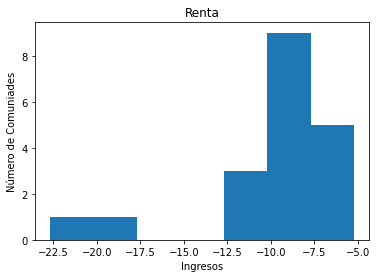

In [ ]:
plt.hist(DatosMatriz[:,1],7 ) # columna 1 = segunda variable
plt.ylabel('Número de Comuniades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()



# Vamos a analizar los datos de muestra de las comunidades autónomas para la Detección de **outliers**
Adaptación del cuaderno **Ejemplo 2.3 Outliers.ipynb**

In [ ]:
Ingresos=DatosMatriz[:,0] # Ingresos medios
datos=Ingresos # para reutilizar el código

**MÉTODO 1:**  Basado en la distribución normal

In [ ]:
# CRITERIO 1: PROBABILIDAD GLOBAL
# probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global de una cola
alfa_g=(1-p_g)/2
# probabilidad  de las colas para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos))
## CRITERIO 2:  Criterio Chauvenet
#alfa=1/(2*len(datos))
Z_alfa=st.norm.ppf(1-alfa/2)
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)# k
print(f" Alfa ={alfa}")
print(f" CUANTIL Z_(1-alfa/2) ={Z_alfa}")

 Alfa =0.00133
 CUANTIL Z_(1-alfa/2) =3.20907


In [ ]:
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Banda= [ 8608.4099,36982.9585]


In [ ]:
# No hay ninguna comunidad outlier respecto a los ingresos
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")


**MÉTODO 2:**  Basado en la distancia entre cuartiles

In [ ]:
Q1 = np.quantile(datos,0.25)
Q3 = np.quantile(datos,0.75)
IQR = Q3 - Q1
k=1.5
xL=Q1 - k * IQR
xU=Q3 + k * IQR
outlier=np.array([]) # almacenamiento de las posiciones de los outliers
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")
          outlier=np.concatenate((outlier,np.array([i])))

**¿Qué comunidades son?**

In [ ]:
Datos.loc[outlier,"Comunidad"]

Series([], Name: Comunidad, dtype: object)

# Aplicamos las técnicas de **escalameniento de datos** a la información que tenemos de las comunidades autónomas

Adaptación del cuaderno **Ejemplo 2.5 Escalamiento de datos.**ipynb

In [ ]:
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
# Escalamiento
# ==============================================================================
# Selección de columnas numéricas tipo doble o enteras
numeric_cols = Datos.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler
preprocessor_MM = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Datos_prep_SS = preprocessor_SS.fit_transform(Datos)
Datos_prep_MM = preprocessor_MM.fit_transform(Datos)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)

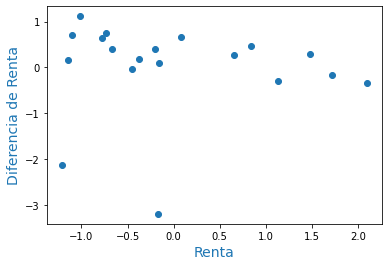

In [ ]:
# Representación de las dos variables escaladas z-score
fig, ax = plt.subplots()
ax.scatter(Datos_prep_SS[:,0], Datos_prep_SS[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()


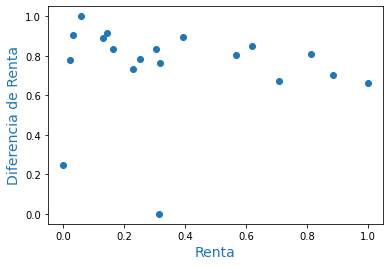

In [ ]:
# Representación de las variables escaladas Min-Max
fig, ax = plt.subplots()
ax.scatter(Datos_prep_MM[:,0], Datos_prep_MM[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()

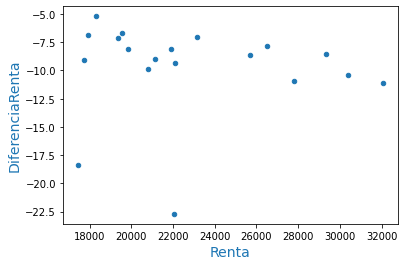

In [ ]:
# Dibujar los datos originales. Integración de matplotlib con pandas
# df.plot
fig, ax = plt.subplots()
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
Datos.plot(kind='scatter', x='Renta', y='DiferenciaRenta',ax=ax)